In [1]:
import torch
import torch.nn.functional as F
import torchvision
from PIL import Image
from torchvision import transforms, utils
import numpy as np
import torch.nn as nn
import torch.optim as optim
import random
import json
import matplotlib.pyplot as plt
import pandas as pd

In [488]:
c_len = 200
p_len = 20
c_per_b = 2
rat = c_len / p_len

di = {}
dv = {}
for i in range(20):
    di[i] = 0
    dv[i] = []
    
db = {}
db_p = {}
for i in range(c_len//c_per_b):
    db[i] = []
    db_p[i] = []
    
for i in range(c_len):
    c = i
    p = int(i//rat)
    b = i % (c_len//c_per_b)
    
    di[int(i//rat)] += 1
    dv[int(i//rat)].append(i)
    db[i % (c_len//c_per_b)].append(i)
    db_p[i % (c_len//c_per_b)].append(int(i//rat))
print(di)

{0: 10, 1: 10, 2: 10, 3: 10, 4: 10, 5: 10, 6: 10, 7: 10, 8: 10, 9: 10, 10: 10, 11: 10, 12: 10, 13: 10, 14: 10, 15: 10, 16: 10, 17: 10, 18: 10, 19: 10}


In [489]:
dv[1]

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [490]:
dv

{0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 1: [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 2: [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
 3: [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
 4: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
 5: [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 6: [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
 7: [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
 8: [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
 9: [90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
 10: [100, 101, 102, 103, 104, 105, 106, 107, 108, 109],
 11: [110, 111, 112, 113, 114, 115, 116, 117, 118, 119],
 12: [120, 121, 122, 123, 124, 125, 126, 127, 128, 129],
 13: [130, 131, 132, 133, 134, 135, 136, 137, 138, 139],
 14: [140, 141, 142, 143, 144, 145, 146, 147, 148, 149],
 15: [150, 151, 152, 153, 154, 155, 156, 157, 158, 159],
 16: [160, 161, 162, 163, 164, 165, 166, 167, 168, 169],
 17: [170, 171, 172, 173, 174, 175, 176, 177, 178, 179],
 18: [180, 181, 182, 183, 184, 185, 186, 187, 188, 189],
 19: [190, 191, 192, 193, 194, 195, 1

In [120]:
db_p

{0: [0, 9],
 1: [0, 10],
 2: [0, 10],
 3: [0, 10],
 4: [0, 10],
 5: [0, 10],
 6: [0, 10],
 7: [0, 10],
 8: [0, 10],
 9: [0, 10],
 10: [1, 11],
 11: [1, 11],
 12: [1, 11],
 13: [1, 11],
 14: [1, 11],
 15: [1, 11],
 16: [1, 11],
 17: [1, 11],
 18: [1, 11],
 19: [1, 11],
 20: [2, 12],
 21: [2, 12],
 22: [2, 12],
 23: [2, 12],
 24: [2, 12],
 25: [2, 12],
 26: [2, 12],
 27: [2, 12],
 28: [2, 12],
 29: [2, 12],
 30: [3, 13],
 31: [3, 13],
 32: [3, 13],
 33: [3, 13],
 34: [3, 13],
 35: [3, 13],
 36: [3, 13],
 37: [3, 13],
 38: [3, 13],
 39: [3, 13],
 40: [4, 14],
 41: [4, 14],
 42: [4, 14],
 43: [4, 14],
 44: [4, 14],
 45: [4, 14],
 46: [4, 14],
 47: [4, 14],
 48: [4, 14],
 49: [4, 14],
 50: [5, 15],
 51: [5, 15],
 52: [5, 15],
 53: [5, 15],
 54: [5, 15],
 55: [5, 15],
 56: [5, 15],
 57: [5, 15],
 58: [5, 15],
 59: [6, 16],
 60: [6, 16],
 61: [6, 16],
 62: [6, 16],
 63: [6, 16],
 64: [6, 16],
 65: [6, 16],
 66: [6, 16],
 67: [6, 16],
 68: [6, 16],
 69: [7, 17],
 70: [7, 17],
 71: [7, 17],
 72

In [121]:
db

{0: [0, 98],
 1: [1, 99],
 2: [2, 100],
 3: [3, 101],
 4: [4, 102],
 5: [5, 103],
 6: [6, 104],
 7: [7, 105],
 8: [8, 106],
 9: [9, 107],
 10: [10, 108],
 11: [11, 109],
 12: [12, 110],
 13: [13, 111],
 14: [14, 112],
 15: [15, 113],
 16: [16, 114],
 17: [17, 115],
 18: [18, 116],
 19: [19, 117],
 20: [20, 118],
 21: [21, 119],
 22: [22, 120],
 23: [23, 121],
 24: [24, 122],
 25: [25, 123],
 26: [26, 124],
 27: [27, 125],
 28: [28, 126],
 29: [29, 127],
 30: [30, 128],
 31: [31, 129],
 32: [32, 130],
 33: [33, 131],
 34: [34, 132],
 35: [35, 133],
 36: [36, 134],
 37: [37, 135],
 38: [38, 136],
 39: [39, 137],
 40: [40, 138],
 41: [41, 139],
 42: [42, 140],
 43: [43, 141],
 44: [44, 142],
 45: [45, 143],
 46: [46, 144],
 47: [47, 145],
 48: [48, 146],
 49: [49, 147],
 50: [50, 148],
 51: [51, 149],
 52: [52, 150],
 53: [53, 151],
 54: [54, 152],
 55: [55, 153],
 56: [56, 154],
 57: [57, 155],
 58: [58, 156],
 59: [59, 157],
 60: [60, 158],
 61: [61, 159],
 62: [62, 160],
 63: [63, 161]

In [162]:
b_prob = torch.tensor([[3,5,1.7,4,3.2], [1,6,3.2,0.1,4.2]])
b_prob = b_prob / torch.sum(b_prob, dim=-1,keepdim=True)
b_prob

tensor([[0.1775, 0.2959, 0.1006, 0.2367, 0.1893],
        [0.0690, 0.4138, 0.2207, 0.0069, 0.2897]])

In [168]:
torch.sort(b_prob, dim=-1, descending=True)[1][:,0]

tensor([1, 1])

In [145]:
for i in range(1, b_prob.size(1)):
    b_prob[:,i] = b_prob[:,i-1] + b_prob[:,i]

In [146]:
b_prob

tensor([[0.1775, 0.4734, 0.5740, 0.8107, 1.0000],
        [0.0690, 0.4828, 0.7034, 0.7103, 1.0000]])

In [153]:
b_prob >= p

tensor([[False, False, False,  True,  True],
        [False,  True,  True,  True,  True]])

In [161]:
for i in range(b_prob.size(0)):
    print(torch.nonzero(b_prob[i] >= p[i], as_tuple=True)[0][0])

tensor(3)
tensor(1)


In [170]:
torch.zeros([1,2])

tensor([[0., 0.]])

In [178]:
[range(0, 98)]

[range(0, 98)]

In [180]:
noise = torch.FloatTensor(2, 4)
noise

tensor([[2.0583e-19, 2.0704e-19, 1.7408e+25, 3.0953e-18],
        [1.4131e+05, 4.5836e-41, 4.8345e-05, 4.5836e-41]])

In [198]:
x = torch.tensor([0.8])
t1 = torch.ones_like(x)
t0 = torch.zeros_like(x)
print(nn.BCELoss()(x, t1), nn.BCELoss()(x, t0))

tensor(0.2231) tensor(1.6094)


In [220]:
x = torch.tensor([1.2,0,3.4], requires_grad=True)

In [221]:
y = x
# y.backward(torch.tensor([1,2,2]))

In [222]:
z = torch.sum((torch.tensor([1,2,2]) * y))

In [223]:
z.backward()

In [224]:
x.grad

tensor([1., 2., 2.])

In [228]:
torch.randint(0, 200, ())

tensor(117)

In [363]:
class PBMatcher(nn.Module):
    '''
    Taking p code as input and predict the probability of matching b code
    '''
    def __init__(self):
        super().__init__()
        self.p_dim = 20
        self.define_module()

    def define_module(self):
        pdim = self.p_dim
        self.predictor = nn.Sequential(
            nn.Linear(pdim, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 20),
            nn.Softmax(dim=-1)
        )

    def forward(self, p_code):
        b_prob = self.predictor(p_code)
        return b_prob

In [364]:
matcher = PBMatcher()
opt = optim.Adam(matcher.parameters(),
                lr=2e-4,
                betas=(0.5, 0.999))

In [365]:
p_code = torch.zeros(1,20)
p_code[0][4] = 1
# p_code[1][6] = 1

In [392]:
b_prob = matcher(p_code)
b_prob

tensor([[0.0510, 0.0495, 0.0546, 0.0465, 0.0459, 0.0473, 0.0480, 0.0500, 0.0511,
         0.0484, 0.0516, 0.0565, 0.0520, 0.0511, 0.0463, 0.0541, 0.0495, 0.0459,
         0.0509, 0.0497]], grad_fn=<SoftmaxBackward>)

In [393]:
opt.zero_grad()
loss = torch.zeros_like(b_prob)
loss[0][0] = -1
loss[0][1] = 1

b_prob.backward(loss)
# l = torch.sum(b_prob * loss) * 10
# l.backward()
# print(matcher.predictor[-2].weight.grad)
opt.step()

In [394]:
b_prob = matcher(p_code)
b_prob

tensor([[0.0513, 0.0494, 0.0547, 0.0464, 0.0460, 0.0473, 0.0480, 0.0500, 0.0510,
         0.0484, 0.0515, 0.0565, 0.0520, 0.0510, 0.0462, 0.0541, 0.0496, 0.0460,
         0.0509, 0.0497]], grad_fn=<SoftmaxBackward>)

In [266]:
x = torch.tensor([0.5,0.5,0.,0.], requires_grad=True)
l = nn.MSELoss()(x, torch.tensor([1.,0.,0.,0.]))
l.backward()

In [309]:
print(matcher.predictor[-2].weight.grad)

tensor([[-0.0157,  0.0000,  0.0000,  ...,  0.0000, -0.0560, -0.0403],
        [-0.0150,  0.0000,  0.0000,  ...,  0.0000, -0.0533, -0.0383],
        [ 0.0016,  0.0000,  0.0000,  ...,  0.0000,  0.0058,  0.0042],
        ...,
        [ 0.0019,  0.0000,  0.0000,  ...,  0.0000,  0.0066,  0.0047],
        [ 0.0017,  0.0000,  0.0000,  ...,  0.0000,  0.0059,  0.0042],
        [ 0.0017,  0.0000,  0.0000,  ...,  0.0000,  0.0062,  0.0045]])


In [280]:
(F.relu(torch.tensor(0.5) - torch.tensor(0.9)))**2 * 1e-5

tensor(0.)

In [346]:
b_prob = matcher(p_code)
b_prob

tensor([[0.0483, 0.0474, 0.0527, 0.0466, 0.0498, 0.0485, 0.0464, 0.0478, 0.0498,
         0.0547, 0.0477, 0.0507, 0.0487, 0.0506, 0.0528, 0.0509, 0.0526, 0.0483,
         0.0512, 0.0543],
        [0.0485, 0.0469, 0.0505, 0.0471, 0.0515, 0.0482, 0.0479, 0.0459, 0.0500,
         0.0544, 0.0472, 0.0509, 0.0494, 0.0523, 0.0535, 0.0513, 0.0526, 0.0489,
         0.0499, 0.0530]], grad_fn=<SoftmaxBackward>)

In [353]:
batch_prob = torch.sum(b_prob, dim=0)
batch_prob

tensor([0.0969, 0.0943, 0.1032, 0.0937, 0.1012, 0.0968, 0.0944, 0.0938, 0.0998,
        0.1090, 0.0950, 0.1016, 0.0981, 0.1030, 0.1063, 0.1021, 0.1051, 0.0973,
        0.1011, 0.1073], grad_fn=<SumBackward1>)

In [354]:
target = torch.ones_like(batch_prob) * (0.1)
sparsity_loss = torch.sum(F.relu(batch_prob - target)) * 1e3

In [355]:
sparsity_loss.backward()
opt.step()
# F.relu(batch_prob - target)

In [356]:
b_prob = matcher(p_code)
b_prob

tensor([[0.0484, 0.0474, 0.0527, 0.0466, 0.0497, 0.0485, 0.0465, 0.0479, 0.0498,
         0.0546, 0.0478, 0.0507, 0.0488, 0.0506, 0.0528, 0.0509, 0.0525, 0.0484,
         0.0512, 0.0542],
        [0.0486, 0.0469, 0.0505, 0.0471, 0.0514, 0.0483, 0.0480, 0.0459, 0.0500,
         0.0543, 0.0473, 0.0508, 0.0494, 0.0523, 0.0535, 0.0512, 0.0526, 0.0490,
         0.0499, 0.0530]], grad_fn=<SoftmaxBackward>)

In [357]:
F.relu(batch_prob - target)

tensor([0.0000, 0.0000, 0.0032, 0.0000, 0.0012, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0090, 0.0000, 0.0016, 0.0000, 0.0030, 0.0063, 0.0021, 0.0051, 0.0000,
        0.0011, 0.0073], grad_fn=<ReluBackward0>)

In [358]:
F.relu(batch_prob - target)

tensor([0.0000, 0.0000, 0.0032, 0.0000, 0.0012, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0090, 0.0000, 0.0016, 0.0000, 0.0030, 0.0063, 0.0021, 0.0051, 0.0000,
        0.0011, 0.0073], grad_fn=<ReluBackward0>)

In [414]:
l = [[1,2,3,4], 4.]
l[1] += 2 - torch.tensor(1)

In [415]:
l

[[1, 2, 3, 4], tensor(5.)]

In [418]:
pb_eval_record = {}
for pid in range(4):
    for bid in range(5):
        pb_eval_record[pid] = {}
#         pb_eval_record[pid][bid] = [[0.] * 5, 0.]
pb_eval_record

{0: {}, 1: {}, 2: {}, 3: {}}

In [423]:
pb_eval_record[0][1] = 1

In [424]:
pb_eval_record

{0: {0: 1, 1: 1}, 1: {}, 2: {}, 3: {}}

In [427]:
l[0][torch.tensor(1)]

2

In [437]:
x = torch.tensor([[0.9], [0.3]])
t = torch.tensor([[1.], [1.]])
nn.BCELoss(reduction='none')(x,t)

tensor([[0.1054],
        [1.2040]])

In [433]:
nn.BCELoss(reduction='sum')(x,t)/8

tensor(0.1845)

In [440]:
torch.sum(b_prob**2)

tensor(0.0502, grad_fn=<SumBackward0>)

In [484]:
n = 20
x = torch.ones(n) * (1/n)
torch.sum(torch.pow(x, 1/4))

tensor(9.4574)

In [478]:
y = torch.tensor([2, 0.09, 0.01])
torch.pow(y, 1/4)

tensor([1.1892, 0.5477, 0.3162])

In [468]:
torch.sum(torch.sqrt(y))

tensor(1.2944)

In [481]:
torch.randint(0,1,(100,))

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])

In [475]:
nn.BCELoss(reduction='none')(torch.ones(3,3), torch.ones(3,3))

tensor([[-0., -0., -0.],
        [-0., -0., -0.],
        [-0., -0., -0.]])

In [496]:
ratio = 196 / 20
cid = torch.tensor([3,153])
print(cid / ratio)
pid = (cid / ratio).long()
print(pid)

tensor([ 0.3061, 15.6122])
tensor([ 0, 15])


In [507]:
for _ in range(20):
    print(random.sample(range(2), 1))
    cid = torch.randint(0, 196, ())
    bid = cid % 98
#     print(cid.item(), bid.item())

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[0]
[0]
[1]
[0]


In [503]:
196 % 98

0

In [504]:
import random

In [509]:
mk = torch.rand(2,1,4,4)
mk

tensor([[[[0.8552, 0.4019, 0.4003, 0.5656],
          [0.0564, 0.1251, 0.9454, 0.7668],
          [0.8904, 0.2443, 0.7307, 0.6531],
          [0.7251, 0.8738, 0.4215, 0.9629]]],


        [[[0.5373, 0.3210, 0.2584, 0.3989],
          [0.9778, 0.0486, 0.7035, 0.5211],
          [0.6611, 0.0140, 0.9629, 0.0250],
          [0.9247, 0.2079, 0.5274, 0.5256]]]])

In [512]:
mk.repeat(1,3,1,1).size()

torch.Size([2, 3, 4, 4])

In [513]:
mk

tensor([[[[0.8552, 0.4019, 0.4003, 0.5656],
          [0.0564, 0.1251, 0.9454, 0.7668],
          [0.8904, 0.2443, 0.7307, 0.6531],
          [0.7251, 0.8738, 0.4215, 0.9629]]],


        [[[0.5373, 0.3210, 0.2584, 0.3989],
          [0.9778, 0.0486, 0.7035, 0.5211],
          [0.6611, 0.0140, 0.9629, 0.0250],
          [0.9247, 0.2079, 0.5274, 0.5256]]]])

In [514]:
x = torch.rand(4, 6)
y = torch.rand(4, 3)

In [519]:
torch.cat((x,y), dim=1)

tensor([[0.7619, 0.0466, 0.0277, 0.8419, 0.1469, 0.0887, 0.1443, 0.1311, 0.4428],
        [0.9335, 0.0502, 0.3303, 0.3185, 0.8391, 0.0209, 0.0865, 0.7344, 0.1544],
        [0.3968, 0.0582, 0.1033, 0.4386, 0.0410, 0.6191, 0.5357, 0.3286, 0.1669],
        [0.4524, 0.6361, 0.5558, 0.8449, 0.1842, 0.4534, 0.1836, 0.1452, 0.6936]])

In [520]:
x

tensor([[0.7619, 0.0466, 0.0277, 0.8419, 0.1469, 0.0887],
        [0.9335, 0.0502, 0.3303, 0.3185, 0.8391, 0.0209],
        [0.3968, 0.0582, 0.1033, 0.4386, 0.0410, 0.6191],
        [0.4524, 0.6361, 0.5558, 0.8449, 0.1842, 0.4534]])

In [521]:
y

tensor([[0.1443, 0.1311, 0.4428],
        [0.0865, 0.7344, 0.1544],
        [0.5357, 0.3286, 0.1669],
        [0.1836, 0.1452, 0.6936]])

In [9]:
torch.randint(0, 20, (20,))

tensor([ 7, 17,  4,  4,  7, 17, 10, 19,  7,  2, 17, 19, 11, 15, 16,  2, 15,  2,
        13,  0])

In [7]:
random.sample(range(2), 5)

ValueError: Sample larger than population or is negative

In [44]:
random.sample(set(range(5)), 2)

[1, 3]

In [52]:
s = set(range(5))
s.remove(7)
s

KeyError: 7

In [15]:
l.pop(0)

1

In [21]:
l = list(np.random.randint(10, size=10))
l

[4, 9, 6, 6, 9, 0, 2, 3, 3, 5]

In [21]:
random.sample(list(range(5)), 1)

[3]

In [48]:
a = torch.argmax(torch.tensor([0,1,2])).item()
# a
type(a)

int

In [25]:
l = {0:[0],1:[0,1],2:[0,1,a]}
l

{0: [0], 1: [0, 1], 2: [0, 1, 2]}

In [68]:
with open("test.txt", "w") as fp:
     json.dump(l, fp)

In [69]:
with open("test.txt", "r") as fp:
     b = json.load(fp)

In [70]:
b

[3, 6, 3, 9, 1, 4, 9, 9, 1, 9]

In [67]:
l = np.random.randint(10, size=10).tolist()

In [66]:
l

[0, 3, 4, 9, 0, 8, 6, 0, 9, 0]

In [82]:
a = torch.FloatTensor(2,1).uniform_(0,1)
a

tensor([[0.0535],
        [0.5591]])

In [83]:
a.expand(2,3,4,4)

RuntimeError: The expanded size of the tensor (4) must match the existing size (2) at non-singleton dimension 2.  Target sizes: [2, 3, 4, 4].  Tensor sizes: [2, 1]

In [85]:
b = torch.rand(2, 1)
b

tensor([[0.9773],
        [0.6948]])

In [86]:
b.expand(2,3,4,4)

RuntimeError: The expanded size of the tensor (4) must match the existing size (2) at non-singleton dimension 2.  Target sizes: [2, 3, 4, 4].  Tensor sizes: [2, 1]

In [87]:
alpha = torch.rand(2, 1)
alpha = alpha.expand(2,3,4,4)

RuntimeError: The expanded size of the tensor (4) must match the existing size (2) at non-singleton dimension 2.  Target sizes: [2, 3, 4, 4].  Tensor sizes: [2, 1]

In [103]:
x = torch.tensor([1.,2.,3.], requires_grad=True)

In [104]:
y = torch.tensor([2,1,3]) * x

In [101]:
torch.sum(y).backward()

In [102]:
x.grad

tensor([2., 1., 3.])

In [106]:
with torch.no_grad():
    z = 2 * y

In [107]:
torch.sum(z).backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [108]:
k = z * 3

In [110]:
torch.sum(k).backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [116]:
torch.argmax(torch.tensor([1,3,2,6]))/2.1

tensor(1.4286)

In [2]:
criterion_class = nn.CrossEntropyLoss()

In [152]:
p = torch.ones(3, 20) * 0.1

tensor([0, 0, 0])

In [164]:
target

tensor([17,  1,  3])

In [163]:
# input = torch.randn(3, 20)
target = torch.empty(3, dtype=torch.long).random_(20)
output = criterion_class(p, target)
output

tensor(2.9957)

In [32]:
img = Image.open('1.jpg')

In [30]:
def get_mask(imshape, bbox):
    c, r = imshape
    x1, y1, w, h = bbox
    x2 = x1 + w
    y2 = y1 + h
    x1 = x1
    y1 = y1
    x1 = max(0, x1)
    y1 = max(0, y1)
    x2 = min(c-1, x2)
    y2 = min(r-1, y2)
    mask = np.zeros((r, c))
    mask[y1:y2+1, x1:x2+1] = 1
#     plt.imshow(mask, cmap='gray')
    return Image.fromarray(mask)

In [33]:
bbox = [69, 57, 199, 141]
imshape = img.size
mask = get_mask(imshape, bbox)
# mask.show()

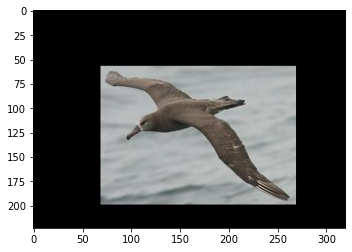

In [61]:
show_masked_img(img, mask)

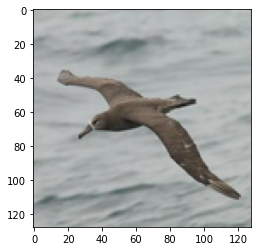

In [130]:
_img = transforms.functional.resize(img, 128, 1)
_img = transforms.functional.center_crop(_img, 128)
plt.imshow(_img)

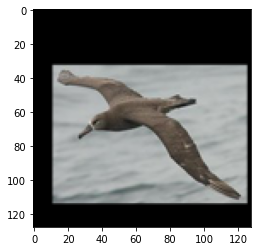

In [131]:
_mask = transforms.functional.resize(mask, 128)
_mask = transforms.functional.center_crop(_mask, 128)
show_masked_img(_img, _mask)

In [116]:
print(transforms.ToTensor()(_mask)[0][15])

tensor([ 0.0033, -0.0161, -0.0638, -0.0606, -0.0611, -0.0612, -0.0612, -0.0612,
        -0.0612, -0.0612, -0.0612, -0.0612, -0.0612, -0.0602, -0.0656, -0.0302])


In [47]:
def mk2rgb(mask):
    incd = np.expand_dims(np.asarray(mask), axis=2)
    return np.repeat(incd, 3, axis=2)

In [60]:
def show_masked_img(image, mask):
    plt.imshow((np.asarray(image) * mk2rgb(np.asarray(mask))).astype(np.uint8))

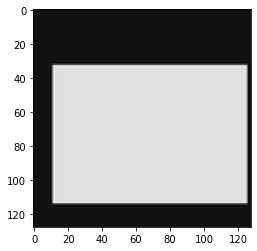

In [75]:
plt.imshow(np.asarray(_mask), cmap='gray')

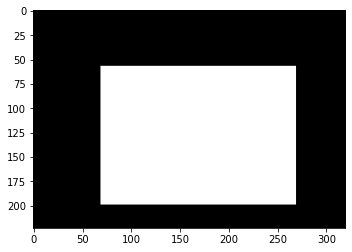

In [76]:
plt.imshow(np.asarray(mask), cmap='gray')

In [81]:
img.save('_mk.jpg')

In [86]:
utils.save_image(transforms.ToTensor()(_mask), 'test.png')

/Users/austin/opt/anaconda3/lib/python3.8/site-packages/torchvision/transforms/functional.py:92: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:141.)
  img = torch.from_numpy(np.array(pic, np.float32, copy=False))


In [88]:
np.asarray(_mask).max()

1.1559308

In [94]:
i = torch.rand(1)
if i > 0.5:
    print(i)

tensor([0.9593])


tensor([False])

In [133]:
torch.min(transforms.ToTensor()(_mask))

tensor(0.)

In [99]:
torch.min(transforms.ToTensor()(mask))

tensor(0.)

In [104]:
torch.set_printoptions(threshold=1000000)


tensor([[[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.

In [119]:
np.asarray(_mask)[15].shape

(16,)

In [129]:
Image.NEAREST

0

In [165]:
884+3212

4096

In [168]:
x = torch.rand(4,4)
y = torch.ones(4,4)

In [169]:
nn.BCELoss()(x,y)

tensor(0.8546)

In [173]:
nn.BCELoss()(x.view(2,1,8),y.view(2,1,8))

tensor(0.8546)

In [25]:
df = pd.read_csv("month_gname.csv")
# pd.set_option('default', None)
df

,date,Abbala extremists,Abu Abbas Brigade,Abu Amarah Battalion,Abu Sayyaf Group (ASG),Achik Songna An'pachakgipa Kotok (ASAK),Adan-Abyan Province of the Islamic State,Afar Revolutionary Democratic Unity Front,Ahle Sunnat Wal Jamaat (ASWJ-Pakistan),Ahneish Militia,...,United Tribal Liberation Army (UTLA),Unknown,Vishwa Hindu Parishad (VHP),Weichan Auka Mapu,White Rabbit Three Percent Illinois Patriot Freedom Fighters Militia,White extremists,Wild Individualities,Zagros Eagles,Zeliangrong United Front,Zimbabwe African Nationalist Union (ZANU)
0,2017-07-01,0,1,2,3,4,5,6,7,8,...,330,331,332,333,334,335,336,337,NaN,NaN


In [5]:
cereal_df = pd.read_csv("globalterrorismdb_0718dist.csv", encoding = "ISO-8859-1")

/Users/austin/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
pd.set_option('display.max_columns', None)
cereal_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [6]:
for col in cereal_df:
    if 'Taliban' in cereal_df[col].values:
        print(col)

corp1
corp2
gname
gname2
gname3


<ipython-input-6-691e6d22ecc9>:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'Taliban' in cereal_df[col].values:


In [11]:
pd.set_option('display.max_rows', None)

cereal_df[['corp1', 'corp2', 'gname', 'gname2', 'gname3']][0:100]

,corp1,corp2,gname,gname2,gname3
0,NaN,NaN,MANO-D,NaN,NaN
1,Belgian Ambassador Daughter,NaN,23rd of September Communist League,NaN,NaN
2,Voice of America,NaN,Unknown,NaN,NaN
3,NaN,NaN,Unknown,NaN,NaN
4,NaN,NaN,Unknown,NaN,NaN
5,Cairo Police Department,NaN,Black Nationalists,NaN,NaN
6,Uruguayan Police,NaN,Tupamaros (Uruguay),NaN,NaN
7,Pacific Gas & Electric Company,NaN,Unknown,NaN,NaN
8,R.O.T.C.,NaN,New Year's Gang,NaN,NaN
9,Selective Service,NaN,New Year's Gang,NaN,NaN


In [14]:
cereal_df[['corp1', 'corp2', 'gname', 'gname2', 'gname3']][cereal_df['corp1'] == 'Taliban']

,corp1,corp2,gname,gname2,gname3
63923,Taliban,NaN,Unknown,NaN,NaN
69236,Taliban,NaN,The Northern Alliance (or United Islamic Front...,NaN,NaN
69261,Taliban,NaN,The Northern Alliance (or United Islamic Front...,NaN,NaN
69262,Taliban,NaN,The Northern Alliance (or United Islamic Front...,NaN,NaN
69368,Taliban,NaN,Unknown,NaN,NaN
69691,Taliban,NaN,Unknown,NaN,NaN
69767,Taliban,NaN,Unknown,NaN,NaN
69770,Taliban,NaN,Unknown,NaN,NaN
89682,Taliban,NaN,Unknown,NaN,NaN
93708,Taliban,Not Applicable,Unknown,NaN,NaN


In [21]:
for i, row in cereal_df.iterrows():
    if i == 69236:
        print(type(row['iyear']))

<class 'int'>


In [55]:
total_gname = sorted(set(cereal_df['gname']))
# total_gname = total_gname[0:10]

In [38]:
total_gname = set()
month_dict = {}
for i, row in cereal_df.iterrows():
    year = row['iyear']
    month = row['imonth']
    if year >= 2017:
        day = row['iday']
        gname = row['gname']
        total_gname.add(gname)
        
        month_key = str(year) + '-' + str(month).zfill(2) + '-01'
        if month_key not in month_dict:
            month_dict[month_key] = {}
        if gname not in month_dict[month_key]:
            month_dict[month_key][gname] = 0
        if gname == 'Zimbabwe African Nationalist Union (ZANU)':
            print(month_key)
        month_dict[month_key][gname] += 1

2017-07-01
2017-07-01
2017-07-01


In [39]:
_total_gname = sorted(total_gname)

In [40]:
total_gname = _total_gname

In [37]:
df = pd.read_csv("month_gname.csv")
# pd.set_option('default', None)
df

,date,Abbala extremists,Abu Abbas Brigade,Abu Amarah Battalion,Abu Sayyaf Group (ASG),Achik Songna An'pachakgipa Kotok (ASAK),Adan-Abyan Province of the Islamic State,Afar Revolutionary Democratic Unity Front,Ahle Sunnat Wal Jamaat (ASWJ-Pakistan),Ahneish Militia,...,United Tribal Liberation Army (UTLA),Unknown,Vishwa Hindu Parishad (VHP),Weichan Auka Mapu,White Rabbit Three Percent Illinois Patriot Freedom Fighters Militia,White extremists,Wild Individualities,Zagros Eagles,Zeliangrong United Front,Zimbabwe African Nationalist Union (ZANU)
0,2017-07-01,1,0,1,5,0,0,0,0,0,...,1,360,0,1,0,0,1,0,0,3


In [46]:
with open('month_gname.csv', 'w') as f:
    l = 'date'
    for gname in total_gname:
        if ',' in gname:
            gname = '"' + gname + '"'

        l += ',' + gname
    f.write(l + '\n')


In [47]:
with open('month_gname.csv', 'a') as f:
    for date in month_dict:
        l = date
        for gname in total_gname:
            if gname in month_dict[date]:
                l += ',' + str(month_dict[date][gname])
            else:
                l += ',0'
        f.write(l + '\n')

In [128]:
df[0:5]

,date,Abbala extremists,Abu Abbas Brigade,Abu Amarah Battalion,Abu Sayyaf Group (ASG),Achik Songna An'pachakgipa Kotok (ASAK),Adan-Abyan Province of the Islamic State,Afar Revolutionary Democratic Unity Front,Ahle Sunnat Wal Jamaat (ASWJ-Pakistan),Ahneish Militia,Ahrar al-Sham,Akhil Terai Mukti Morcha (ATMM),Al Bayda Province of the Islamic State,Al-Ashtar Brigades,Al-Islah Party,Al-Nusrah Front,Al-Qaida in the Arabian Peninsula (AQAP),Al-Qaida in the Indian Subcontinent,Al-Qaida in the Islamic Maghreb (AQIM),Al-Shabaab,Al-Yakin Mujahidin,Al-Zawiya Syndicates Council,Albanian extremists,Alex Boncayao Brigade (ABB),Algeria Province of the Islamic State,All Nepal National Free Student Union-Revolutionary,All Tripura Tiger Force (ATTF),Alliance of Patriots for a Free and Sovereign Congo (APCLS),Allied Democratic Forces (ADF),Ambazonia Defense Forces (ADF),Anarchist Collective of Kallithea-Moschato,Anarchist Revolt Against Exiled Gendarmes,Anarchists,Anas al-Dabbashi Brigade,Animal Rights extremists,Ansar Ghazwat-ul-Hind,Ansar al-Dine (Mali),Ansar al-Islam (Burkina Faso),Ansar al-Islam (Egypt),Ansar al-Sharia (Libya),Ansar al-Sharia (Pakistan),Ansar al-Sunna (Mozambique),Ansarullah Bangla Team,Anti-Arab extremists,Anti-Balaka Militia,Anti-Government extremists,Anti-Immigrant extremists,Anti-LGBT extremists,Anti-Muslim extremists,Anti-Police extremists,Anti-Republican extremists,Anti-Semitic extremists,Anti-White extremists,Apella,Arab-Israeli extremists,Arakan Rohingya Salvation Army (ARSA),Arauco Malleco Coordinating Group (CAM) - Chile,Arm na Poblachta' (Army of the Republic),Asa'ib Ahl al-Haqq,Awami League,Bab Tajura Brigade,Babbar Khalsa International (BKI),Bachama extremists,Badr Brigades,Baloch Liberation Army (BLA),Baloch Liberation Front (BLF),Baloch Nationalists,Baloch Republican Army (BRA),Baloch Republican Party,Bangsamoro Islamic Freedom Movement (BIFM),Barisan Revolusi Nasional (BRN),Barqa Province of the Islamic State,Bedouin Israeli extremists,Benghazi Defense Brigades (BDB),Benishangul Gumuz People's Liberation Movement,Bilal Badr Group,Birsa Commando Force (BCF),Bodu Bala Sena,Boko Haram,Bunda Dia Kongo (BDK),Caucasus Province of the Islamic State,Cells of Direct Attack - Living Waste Group,Christian State-Holy Rus,Comite d'Action Viticole,Communist Party of India - Maoist (CPI-Maoist),Communist Party of Nepal - Maoist (CPN-Maoist-Chand),Communists,Conspiracy of Cells of Fire,Conspiracy of Vengeful Arsonists,Coordination of Azawad Movements (CMA),Corsican Nationalists,Council for Justice in Azawad,Crypteia,Democratic Front for the Liberation of Rwanda (FDLR),Democratic Karen Buddhist Army (DKBA),Devrimici Halk Kurtulus Cephesi (DHKP/C),Dissident Republicans,Donetsk People's Republic,Environmentalists,Equilibrio Nacional,Fajr al-Umma Brigade,Fatoni Warriors,February 14th Movement,Feminist extremists,Fezzan Province of the Islamic State,Fight Xenophobia,Fire and Flame for the Police (FFdP),Free Papua Movement (OPM-Organisasi Papua Merdeka),Free Syrian Army,Front for the Liberation of Cabinda / Cabinda Armed Forces (FLEC-FAC),Front for the Restoration of Unity and Democracy,Fulani extremists,Garo National Liberation Army,Gbagbo Loyalists,Good Vision Party (India),Gorkha Janmukti Morcha (GJM),Gorkha Liberation Army (GLA),Government Supporters,Group of Popular Fighters,Groups of Martyr Baha Eleyan,Hafeez Brohi Group,Hamas (Islamic Resistance Movement),Haqqani Network,Harkatul Jihad-e-Islami,Hasam Movement,Hay Andalus Defense Operations Room,Hay'at Tahrir al-Sham,Hezbollah,High Council for the Unity of Azawad (HCUA),Hindu extremists,Hizb-I-Islami,Hizballah-Iraq,Hizbul Mujahideen (HM),Houthi extremists (Ansar Allah),Ijaw extremists,Imam Shamil Battalion,Indian Mujahideen,Indigenous People of Biafra (IPOB),Indigenous People's Front of Tripura (IPFT),Individuals Tending Toward Savagery,Informal Anarchist Federation,Informal Feminist Commando for Anti-authoritarian Action,Irrintzi,Islamic State in Bangladesh,Islamic State i

In [132]:
for g in sorted(month_dict[date]):
    print(g, month_dict[date][g])

Abbala extremists 1
Abu Amarah Battalion 1
Abu Sayyaf Group (ASG) 5
Al-Qaida in the Arabian Peninsula (AQAP) 4
Al-Shabaab 58
Anarchists 3
Anti-Balaka Militia 5
Anti-Immigrant extremists 1
Anti-LGBT extremists 1
Anti-Muslim extremists 1
Anti-Police extremists 1
Arab-Israeli extremists 1
Asa'ib Ahl al-Haqq 1
Baloch Liberation Army (BLA) 2
Baloch Liberation Front (BLF) 1
Baloch Republican Army (BRA) 1
Bangsamoro Islamic Freedom Movement (BIFM) 3
Barqa Province of the Islamic State 1
Boko Haram 39
Communist Party of India - Maoist (CPI-Maoist) 3
Communist Party of Nepal - Maoist (CPN-Maoist-Chand) 1
Environmentalists 2
Free Syrian Army 1
Gbagbo Loyalists 6
Gorkha Janmukti Morcha (GJM) 35
Government Supporters 1
Hasam Movement 3
Hay'at Tahrir al-Sham 6
Hezbollah 1
Hizbul Mujahideen (HM) 6
Houthi extremists (Ansar Allah) 13
Informal Feminist Commando for Anti-authoritarian Action 1
Islamic State in Egypt 3
Islamic State in the Greater Sahara (ISGS) 1
Islamic State of Iraq and the Levant (ISI

In [72]:
for i in month_dict:
    if 'Zimbabwe African Nationalist Union (ZANU)' in month_dict[i]:
    print(month_dict[i]['Zimbabwe African Nationalist Union (ZANU)'])

KeyError: 'Zimbabwe African Nationalist Union (ZANU)'

In [73]:
'Zimbabwe African Nationalist Union (ZANU)' in total_gname

True

In [89]:
month_dict['2017-07-01']['Zimbabwe African Nationalist Union (ZANU)']

3

In [136]:
len(total_gname)

338

In [22]:
total_gname

['Abbala extremists',
 'Abu Abbas Brigade',
 'Abu Amarah Battalion',
 'Abu Sayyaf Group (ASG)',
 "Achik Songna An'pachakgipa Kotok (ASAK)",
 'Adan-Abyan Province of the Islamic State',
 'Afar Revolutionary Democratic Unity Front',
 'Ahle Sunnat Wal Jamaat (ASWJ-Pakistan)',
 'Ahneish Militia',
 'Ahrar al-Sham',
 'Akhil Terai Mukti Morcha (ATMM)',
 'Al Bayda Province of the Islamic State',
 'Al-Ashtar Brigades',
 'Al-Islah Party',
 'Al-Nusrah Front',
 'Al-Qaida in the Arabian Peninsula (AQAP)',
 'Al-Qaida in the Indian Subcontinent',
 'Al-Qaida in the Islamic Maghreb (AQIM)',
 'Al-Shabaab',
 'Al-Yakin Mujahidin',
 'Al-Zawiya Syndicates Council',
 'Albanian extremists',
 'Alex Boncayao Brigade (ABB)',
 'Algeria Province of the Islamic State',
 'All Nepal National Free Student Union-Revolutionary',
 'All Tripura Tiger Force (ATTF)',
 'Alliance of Patriots for a Free and Sovereign Congo (APCLS)',
 'Allied Democratic Forces (ADF)',
 'Ambazonia Defense Forces (ADF)',
 'Anarchist Collective of